<h1><b>EDA</b></h1>

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sys
from pathlib import Path

src_path = Path().resolve().parents[1] / "src"
sys.path.append(str(src_path))

from tools.CONFIG import CONFIG

import warnings
warnings.filterwarnings(action='ignore')

# Configure datapoint

In [2]:
try:
    main_df = pd.read_csv(CONFIG['DATAPOINT']['main_data'])
except FileNotFoundError as e:
    print(f"File not found: {e}")

# Explore Datatype and Manipulation

In [3]:
print(main_df.dtypes.to_string())

periode_data                   int64
tanggal                       object
stasiun                       object
pm_sepuluh                   float64
pm_duakomalima               float64
sulfur_dioksida              float64
karbon_monoksida             float64
ozon                         float64
nitrogen_dioksida            float64
max                          float64
parameter_pencemar_kritis     object
kategori                      object
stasiun_id                    object
is_holiday_nasional            int64
is_weekend                     int64
tahun                          int64


In [4]:
main_df["tanggal"] = pd.to_datetime(main_df["tanggal"], errors="coerce")

main_df[["is_holiday_nasional", "is_weekend"]] = (
    main_df[["is_holiday_nasional", "is_weekend"]].astype("int8")
)

cat_cols = [
    "stasiun",
    "parameter_pencemar_kritis",
    "kategori",
    "stasiun_id",
    # "wilayah",
]

main_df[cat_cols] = main_df[cat_cols].astype("category")

In [5]:
print(main_df.dtypes.to_string())

periode_data                          int64
tanggal                      datetime64[ns]
stasiun                            category
pm_sepuluh                          float64
pm_duakomalima                      float64
sulfur_dioksida                     float64
karbon_monoksida                    float64
ozon                                float64
nitrogen_dioksida                   float64
max                                 float64
parameter_pencemar_kritis          category
kategori                           category
stasiun_id                         category
is_holiday_nasional                    int8
is_weekend                             int8
tahun                                 int64


In [6]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8920 entries, 0 to 8919
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   periode_data               8920 non-null   int64         
 1   tanggal                    8920 non-null   datetime64[ns]
 2   stasiun                    8920 non-null   category      
 3   pm_sepuluh                 7078 non-null   float64       
 4   pm_duakomalima             4522 non-null   float64       
 5   sulfur_dioksida            7457 non-null   float64       
 6   karbon_monoksida           7463 non-null   float64       
 7   ozon                       7451 non-null   float64       
 8   nitrogen_dioksida          7387 non-null   float64       
 9   max                        8910 non-null   float64       
 10  parameter_pencemar_kritis  7512 non-null   category      
 11  kategori                   8920 non-null   category      
 12  stasiu

# Calculate N/A Datas

In [7]:
print(main_df.isnull().sum().to_string())

periode_data                    0
tanggal                         0
stasiun                         0
pm_sepuluh                   1842
pm_duakomalima               4398
sulfur_dioksida              1463
karbon_monoksida             1457
ozon                         1469
nitrogen_dioksida            1533
max                            10
parameter_pencemar_kritis    1408
kategori                        0
stasiun_id                   5799
is_holiday_nasional             0
is_weekend                      0
tahun                           0


# Distribution EDA

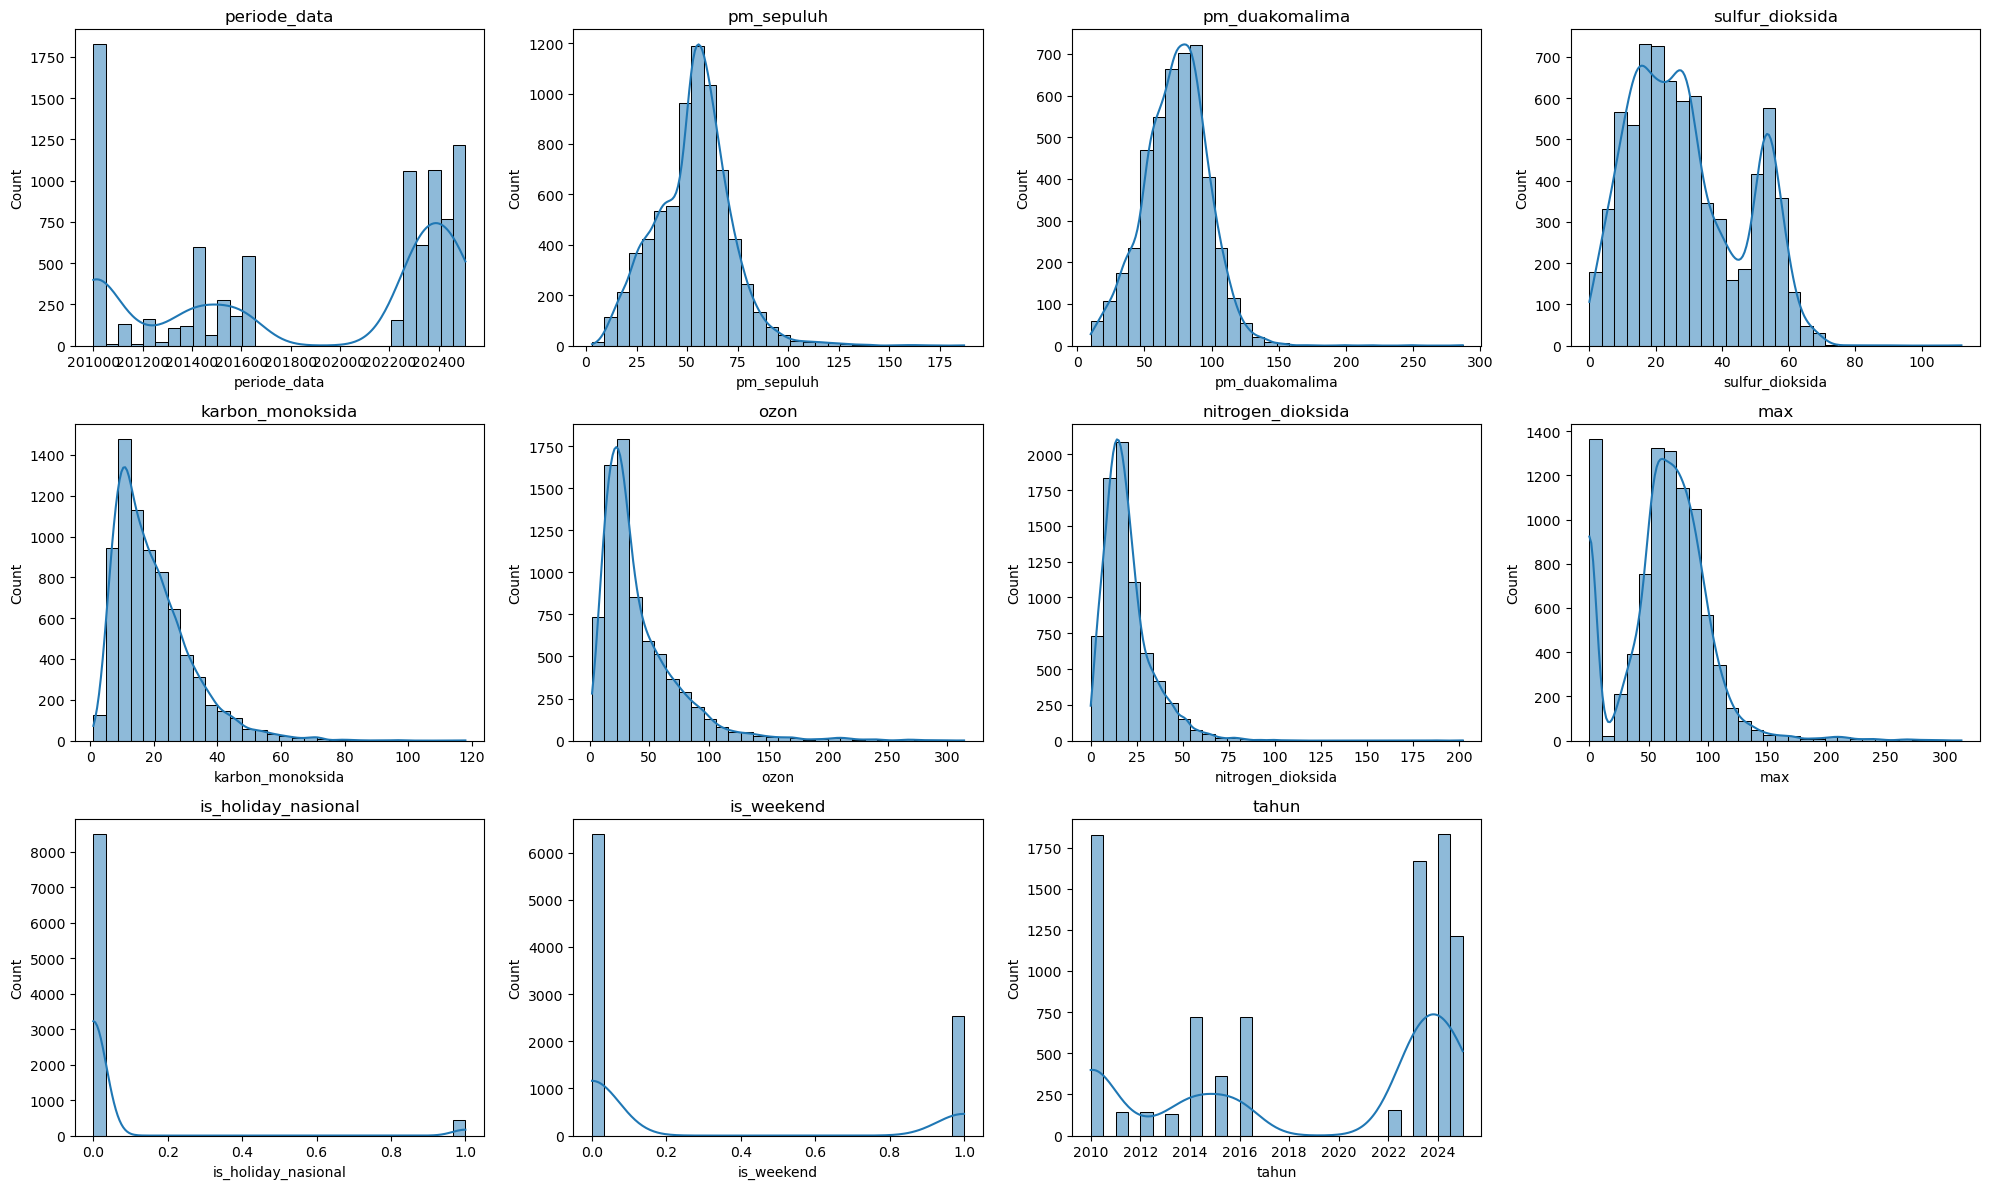

In [8]:
# Select only numerical columns
num_cols = main_df.select_dtypes(include=["int64", "float64", "int8", "Int64"]).columns

n_cols = 4
n_rows = int(np.ceil(len(num_cols) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
axes = axes.flatten()

for ax, col in zip(axes, num_cols):
    sns.histplot(
        data=main_df,
        x=col,
        kde=True,
        bins=30,
        ax=ax
    )
    ax.set_title(col)
    ax.set_ylabel("Count")

for ax in axes[len(num_cols):]:
    ax.remove()

plt.tight_layout()
plt.show()

# Correlation matrix EDA

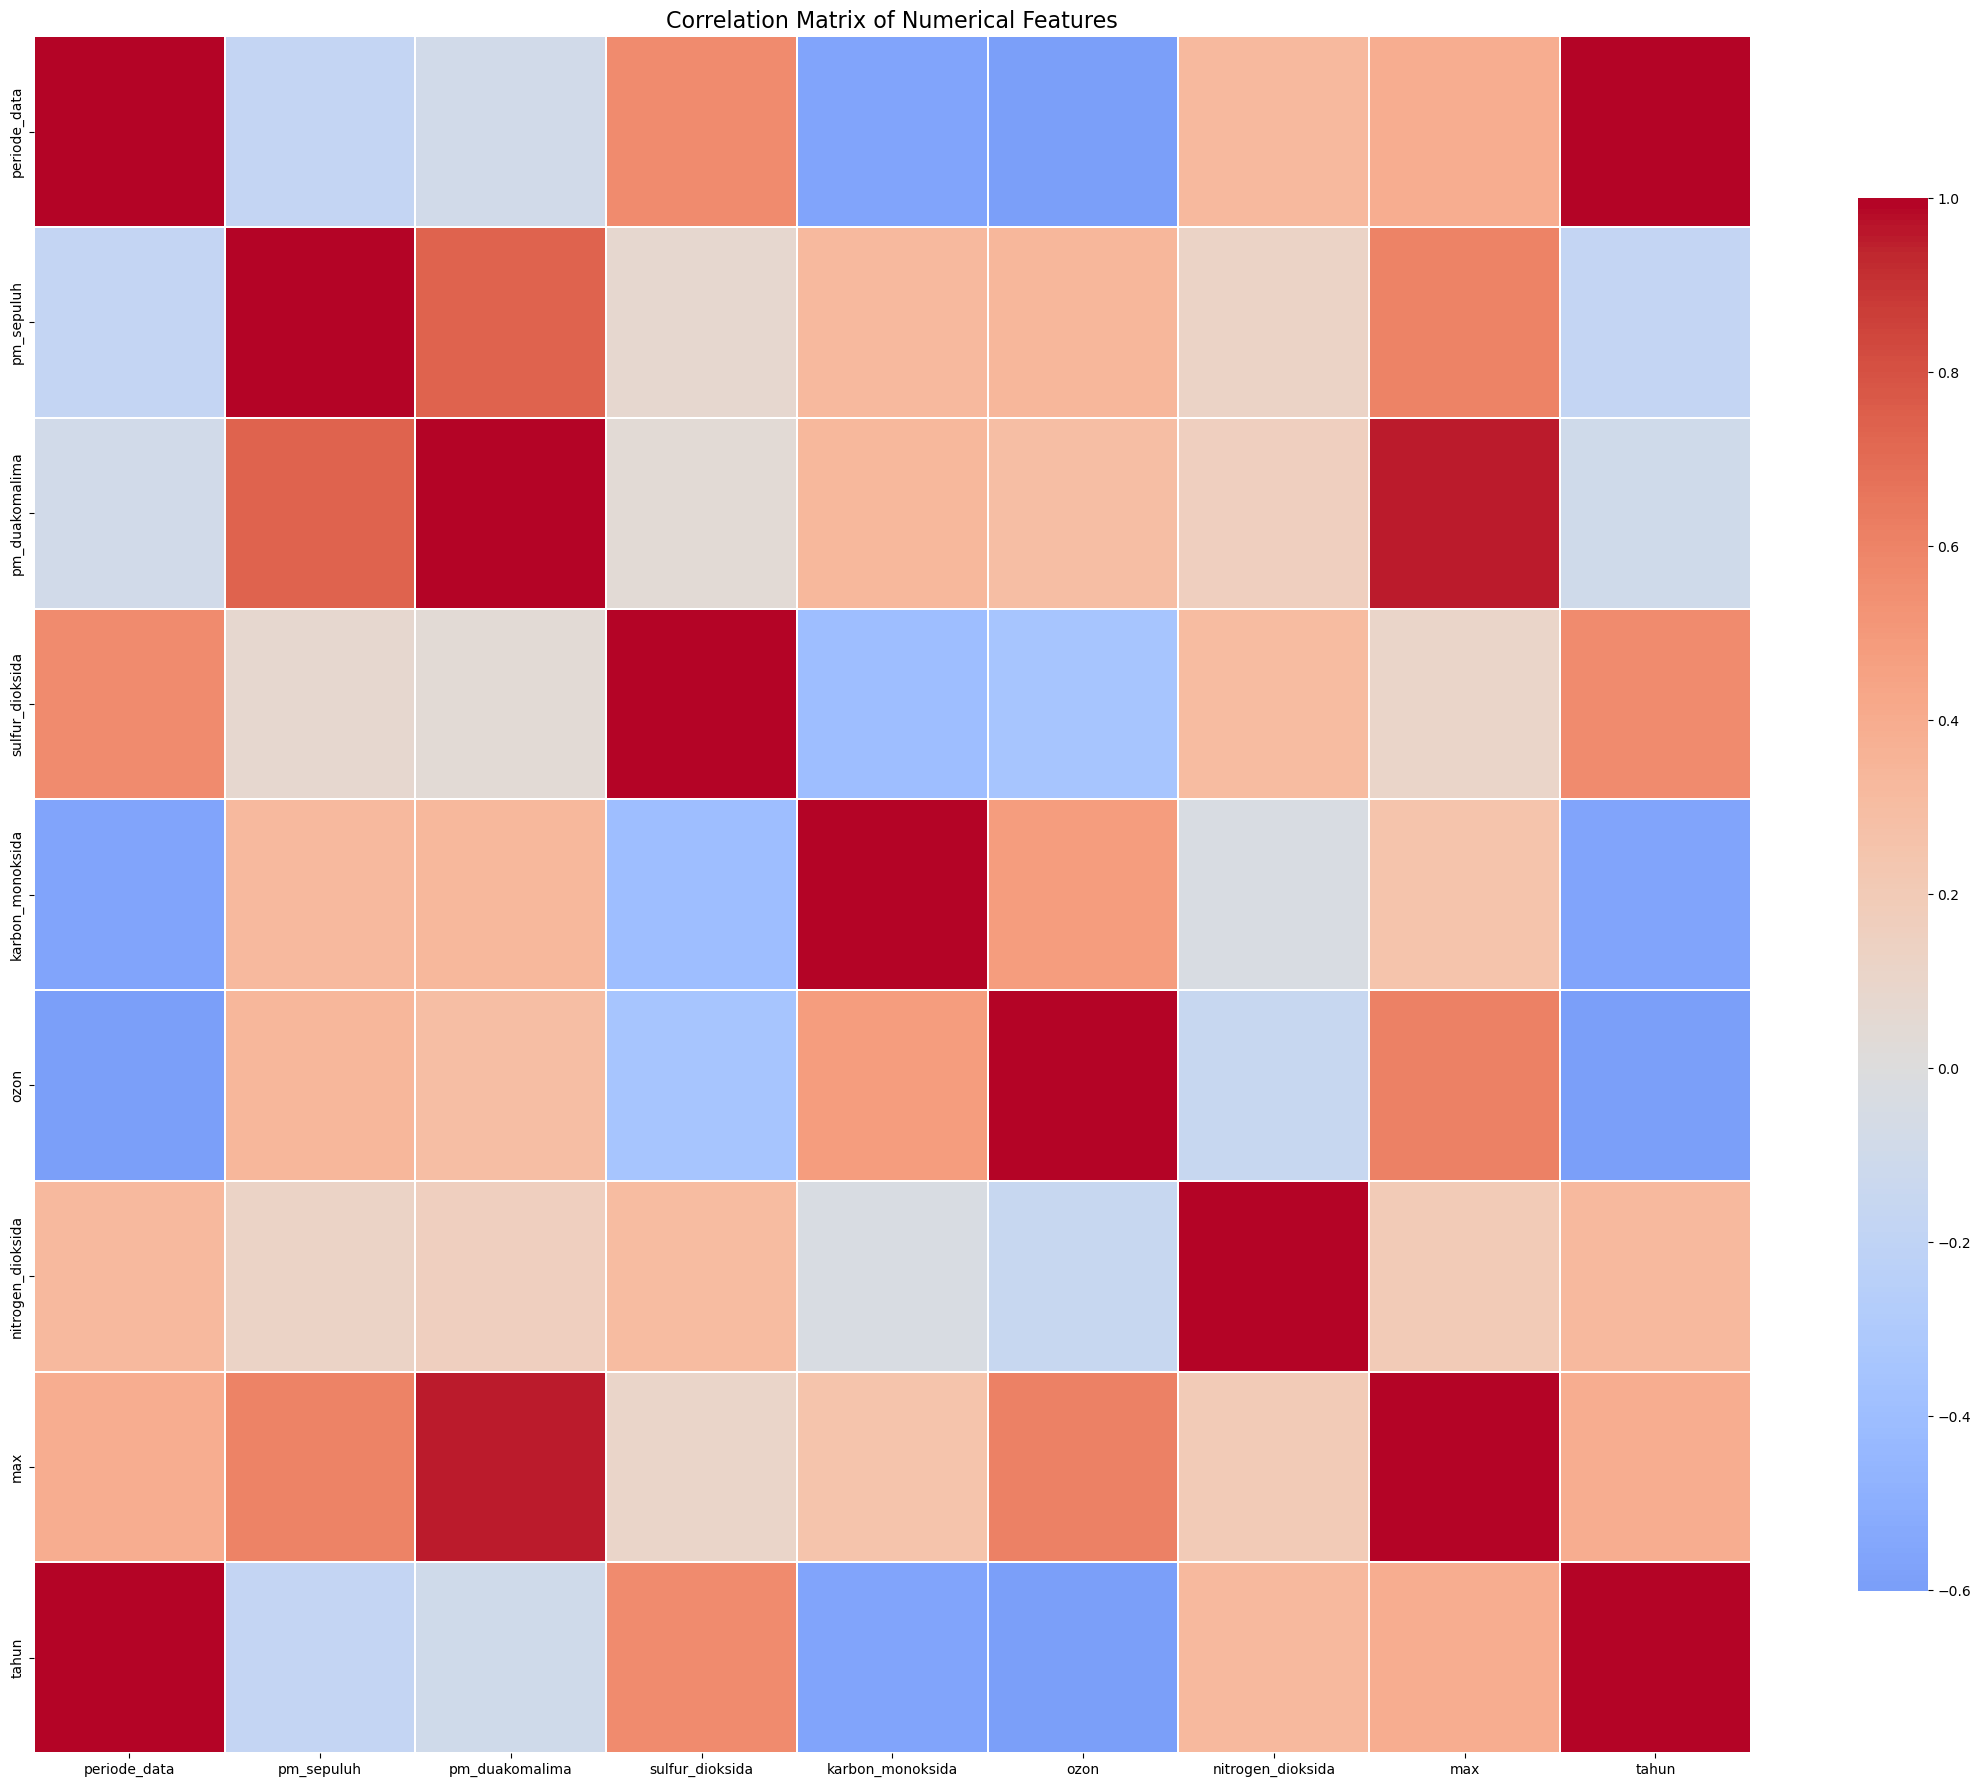

In [9]:
# Select numerical features only
num_df = main_df.select_dtypes(include=["int64", "float64"])

corr = num_df.corr(method="pearson")

plt.figure(figsize=(22, 18))
sns.heatmap(
    corr,
    cmap="coolwarm",
    center=0,
    square=True,
    linewidths=0.3,
    cbar_kws={"shrink": 0.8}
)

plt.title("Correlation Matrix of Numerical Features", fontsize=16)
plt.tight_layout()
plt.show()

# Distribusi Kategori ISPU

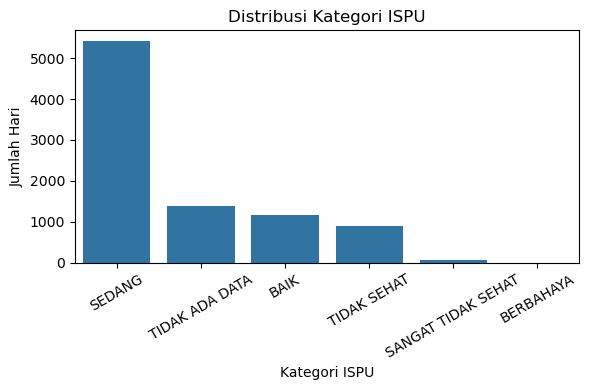

In [10]:
plt.figure(figsize=(6,4))
sns.countplot(
    data=main_df,
    x="kategori",
    order=main_df["kategori"].value_counts().index
)
plt.title("Distribusi Kategori ISPU")
plt.xlabel("Kategori ISPU")
plt.ylabel("Jumlah Hari")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


# Polutan dan Kategorinya

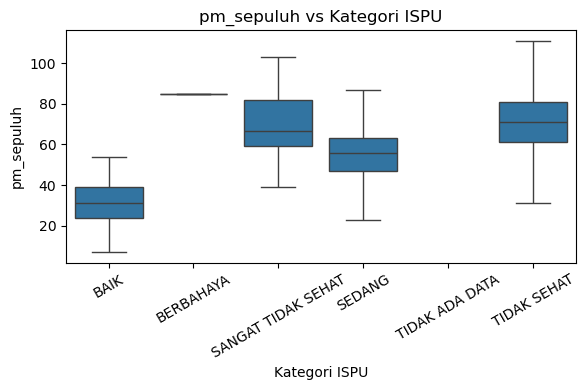

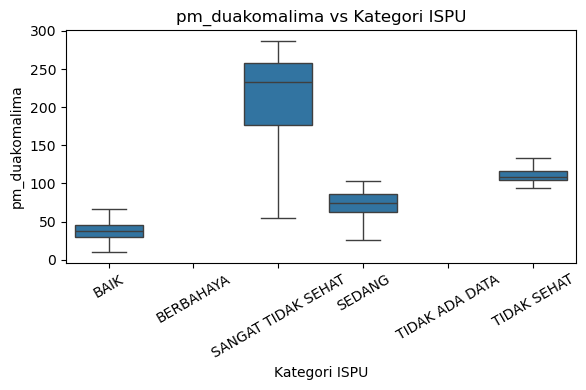

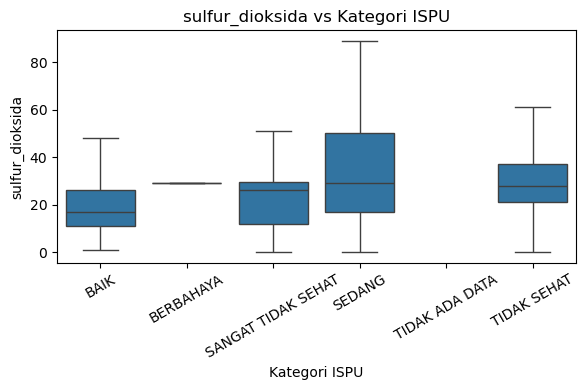

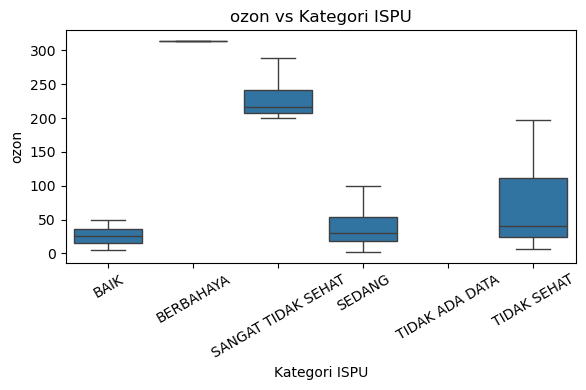

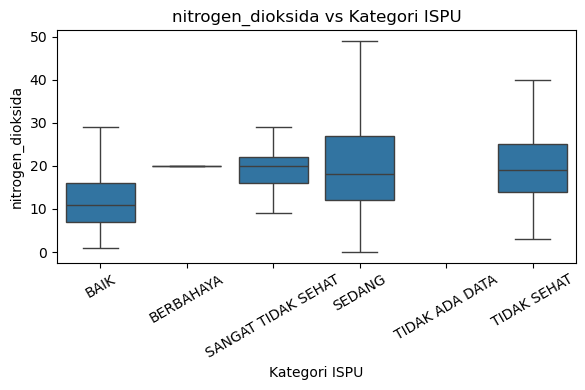

In [11]:
polutan_cols = [
    "pm_sepuluh",
    "pm_duakomalima",
    "sulfur_dioksida",
    "ozon",
    "nitrogen_dioksida"
]

for col in polutan_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(
        data=main_df,
        x="kategori",
        y=col,
        showfliers=False
    )
    plt.title(f"{col} vs Kategori ISPU")
    plt.xlabel("Kategori ISPU")
    plt.ylabel(col)
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.show()


# Time Series Awareness

## Tren PM2.5 Harian

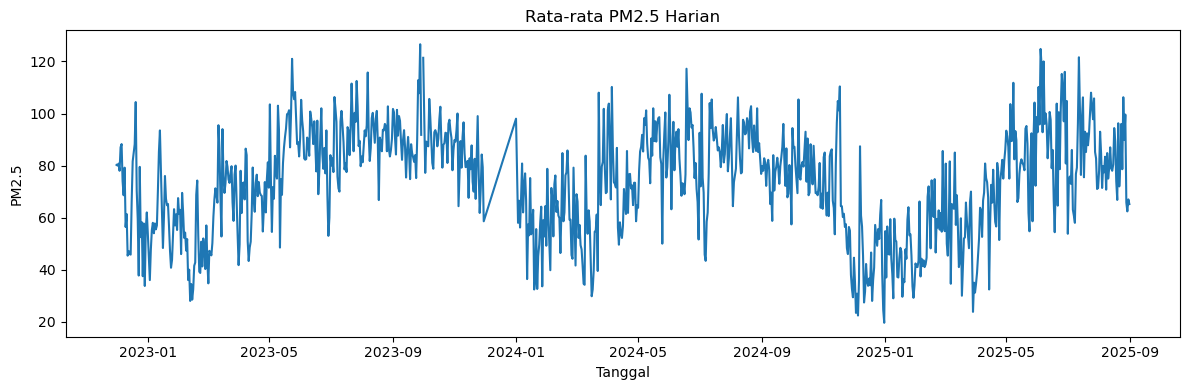

In [12]:
daily_pm25 = (
    main_df
    .groupby("tanggal")["pm_duakomalima"]
    .mean()
    .reset_index()
)

plt.figure(figsize=(12,4))
plt.plot(daily_pm25["tanggal"], daily_pm25["pm_duakomalima"])
plt.title("Rata-rata PM2.5 Harian")
plt.xlabel("Tanggal")
plt.ylabel("PM2.5")
plt.tight_layout()
plt.show()


## Weekday vs Weekend

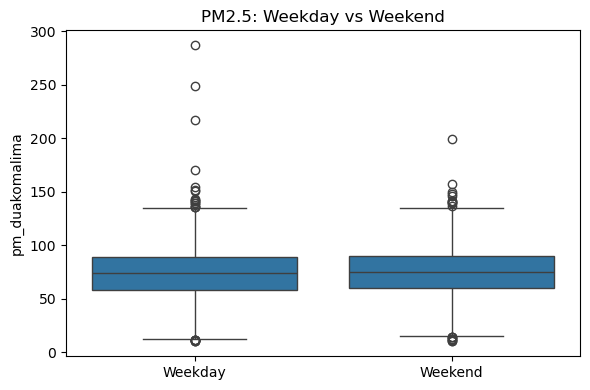

In [13]:
plt.figure(figsize=(6,4))
sns.boxplot(
    data=main_df,
    x="is_weekend",
    y="pm_duakomalima"
)
plt.xticks([0,1], ["Weekday", "Weekend"])
plt.title("PM2.5: Weekday vs Weekend")
plt.xlabel("")
plt.tight_layout()
plt.show()


## Cuaca vs Polutan

In [20]:
cuaca_df = pd.read_csv("/Users/paulinadevinawijaya/Downloads/ARKAVIDIA 10.0 - DSC/data/cuaca-harian/data_cuaca_jakarta.csv")

cuaca_df["time"] = pd.to_datetime(
    cuaca_df["time"],
    errors="coerce"
)

print(cuaca_df.columns.tolist())


['wilayah', 'time', 'temperature_2m_max (°C)', 'temperature_2m_min (°C)', 'precipitation_sum (mm)', 'precipitation_hours (h)', 'wind_speed_10m_max (km/h)', 'wind_direction_10m_dominant (°)', 'shortwave_radiation_sum (MJ/m²)', 'temperature_2m_mean (°C)', 'relative_humidity_2m_mean (%)', 'cloud_cover_mean (%)', 'surface_pressure_mean (hPa)', 'wind_gusts_10m_max (km/h)', 'winddirection_10m_dominant (°)', 'relative_humidity_2m_max (%)', 'relative_humidity_2m_min (%)', 'cloud_cover_max (%)', 'cloud_cover_min (%)', 'wind_gusts_10m_mean (km/h)', 'wind_speed_10m_mean (km/h)', 'wind_gusts_10m_min (km/h)', 'wind_speed_10m_min (km/h)', 'surface_pressure_max (hPa)', 'surface_pressure_min (hPa)']


In [22]:
cuaca_df = cuaca_df[[
    "time",
    "temperature_2m_mean (°C)",
    "relative_humidity_2m_mean (%)",
    "wind_speed_10m_mean (km/h)",
    "precipitation_sum (mm)"
]].rename(columns={
    "time": "tanggal",
    "temperature_2m_mean (°C)": "temp_mean",
    "relative_humidity_2m_mean (%)": "humidity",
    "wind_speed_10m_mean (km/h)": "wind_speed",
    "precipitation_sum (mm)": "precipitation"
})


In [23]:
eda_df = main_df.merge(
    cuaca_df,
    on="tanggal",
    how="left"
)

print(eda_df[["temp_mean", "humidity", "wind_speed", "precipitation"]].isnull().sum())


temp_mean        0
humidity         0
wind_speed       0
precipitation    0
dtype: int64


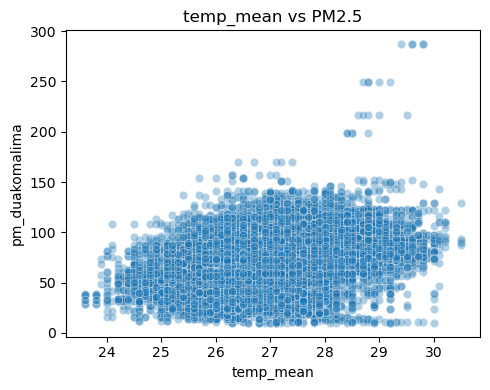

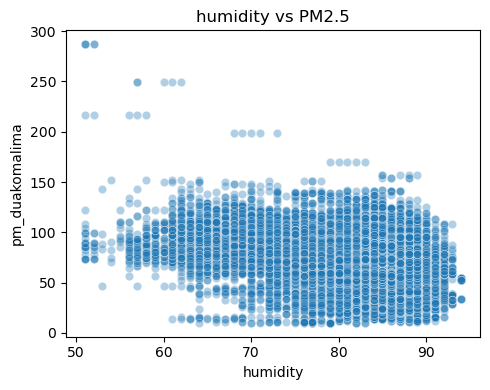

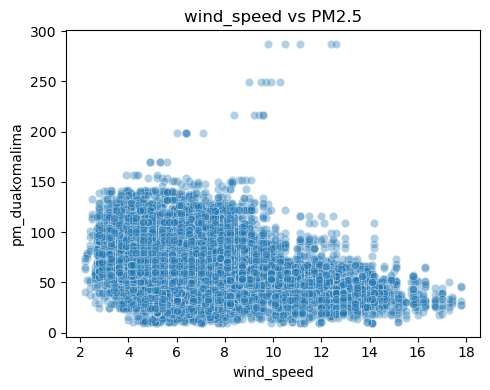

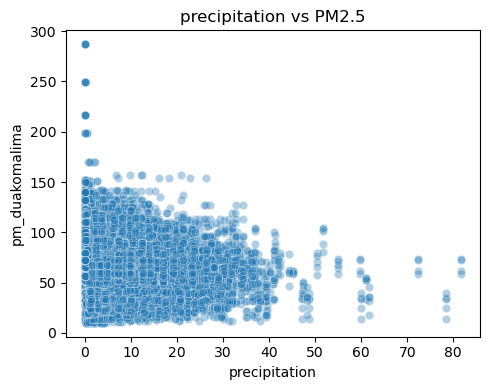

In [24]:
cuaca_cols = ["temp_mean", "humidity", "wind_speed", "precipitation"]

for col in cuaca_cols:
    plt.figure(figsize=(5,4))
    sns.scatterplot(
        data=eda_df,
        x=col,
        y="pm_duakomalima",
        alpha=0.35
    )
    plt.title(f"{col} vs PM2.5")
    plt.tight_layout()
    plt.show()


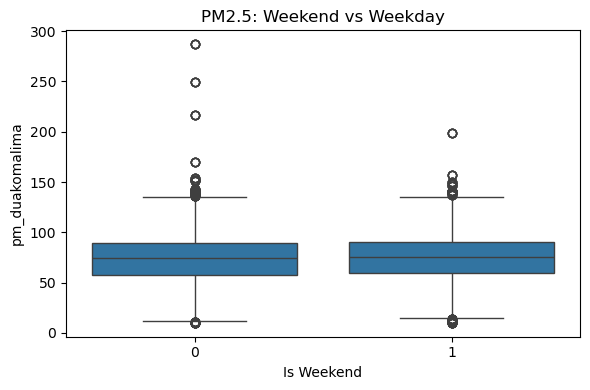

In [25]:
plt.figure(figsize=(6,4))
sns.boxplot(
    data=eda_df,
    x="is_weekend",
    y="pm_duakomalima"
)
plt.title("PM2.5: Weekend vs Weekday")
plt.xlabel("Is Weekend")
plt.tight_layout()
plt.show()


## Perbandingan antar Stasiun

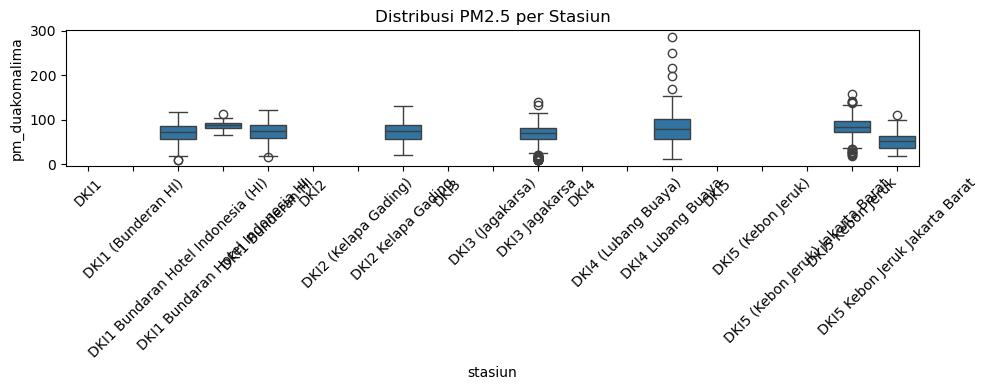

In [26]:
plt.figure(figsize=(10,4))
sns.boxplot(
    data=main_df,
    x="stasiun",
    y="pm_duakomalima"
)
plt.title("Distribusi PM2.5 per Stasiun")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Pola Musiman Polusi

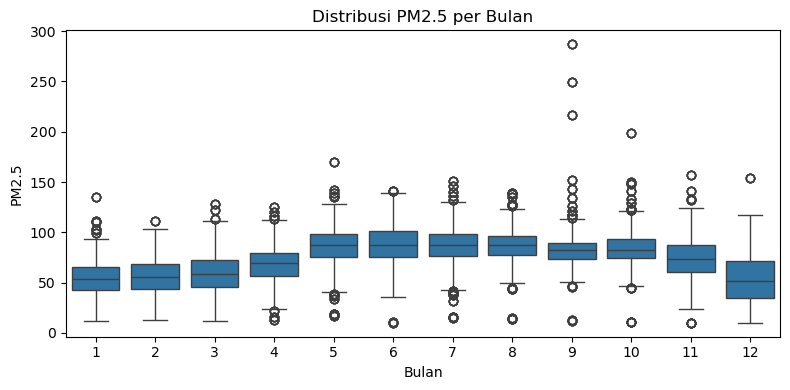

In [27]:
plt.figure(figsize=(8,4))
sns.boxplot(
    data=eda_df,
    x=eda_df["tanggal"].dt.month,
    y="pm_duakomalima"
)
plt.title("Distribusi PM2.5 per Bulan")
plt.xlabel("Bulan")
plt.ylabel("PM2.5")
plt.tight_layout()
plt.show()


## Dampak Curah Hujan terhadap Polusi

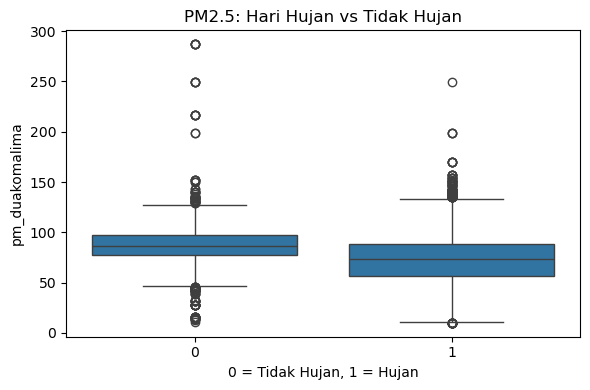

In [28]:
eda_df["is_rain"] = (eda_df["precipitation"] > 0).astype(int)

plt.figure(figsize=(6,4))
sns.boxplot(
    data=eda_df,
    x="is_rain",
    y="pm_duakomalima"
)
plt.title("PM2.5: Hari Hujan vs Tidak Hujan")
plt.xlabel("0 = Tidak Hujan, 1 = Hujan")
plt.tight_layout()
plt.show()


# Angin vs Dispersi Polusi

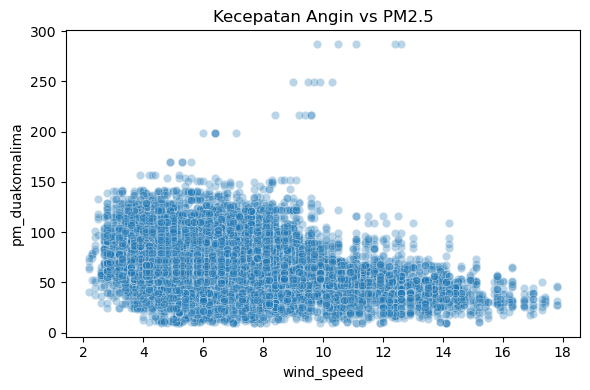

In [29]:
plt.figure(figsize=(6,4))
sns.scatterplot(
    data=eda_df,
    x="wind_speed",
    y="pm_duakomalima",
    alpha=0.3
)
plt.title("Kecepatan Angin vs PM2.5")
plt.tight_layout()
plt.show()


# Polusi vs Aktivitas Manusia (Weekday vs Weekend)

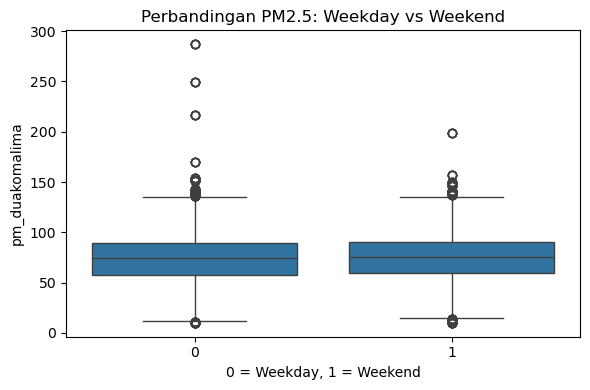

In [30]:
plt.figure(figsize=(6,4))
sns.boxplot(
    data=eda_df,
    x="is_weekend",
    y="pm_duakomalima"
)
plt.title("Perbandingan PM2.5: Weekday vs Weekend")
plt.xlabel("0 = Weekday, 1 = Weekend")
plt.tight_layout()
plt.show()


# Parameter Pencemar Dominan

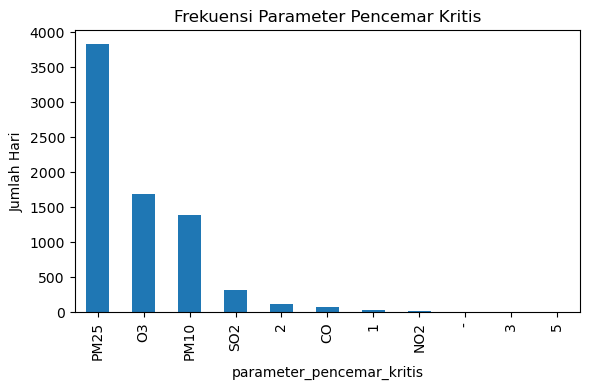

In [31]:
plt.figure(figsize=(6,4))
main_df["parameter_pencemar_kritis"].value_counts().plot(kind="bar")
plt.title("Frekuensi Parameter Pencemar Kritis")
plt.ylabel("Jumlah Hari")
plt.tight_layout()
plt.show()


# Transisi Kategori ISPU

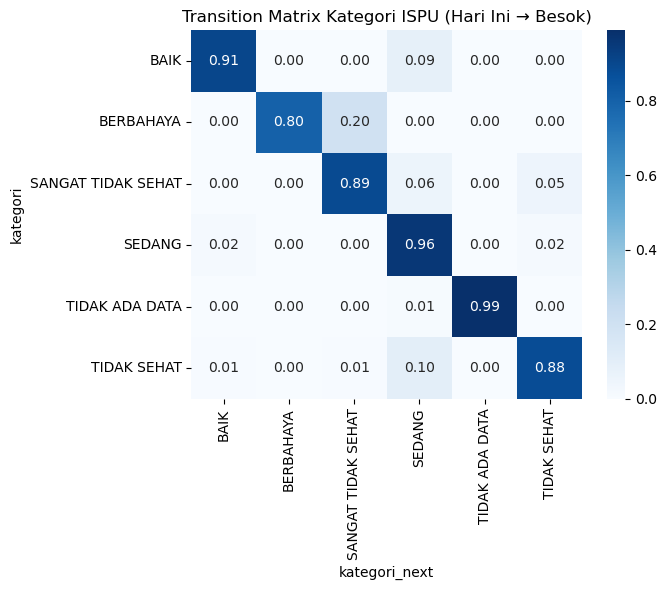

In [32]:
eda_df = eda_df.sort_values(["stasiun", "tanggal"])

eda_df["kategori_next"] = (
    eda_df.groupby("stasiun")["kategori"]
          .shift(-1)
)

transition = pd.crosstab(
    eda_df["kategori"],
    eda_df["kategori_next"],
    normalize="index"
)

plt.figure(figsize=(7,6))
sns.heatmap(
    transition,
    annot=True,
    fmt=".2f",
    cmap="Blues"
)
plt.title("Transition Matrix Kategori ISPU (Hari Ini → Besok)")
plt.tight_layout()
plt.show()
